In [6]:
from langchain.document_loaders import TextLoader

loader = TextLoader('nvda_news_1.txt')
data = loader.load()
data[0].page_content


"The stock of NVIDIA Corp (NASDAQ:NVDA) experienced a daily loss of -3.56% and a 3-month gain of 32.35%. With an Earnings Per Share (EPS) (EPS) of $1.92, the question arises: is the stock significantly overvalued? This article aims to provide a detailed valuation analysis of NVIDIA, offering insights into its financial strength, profitability, growth, and more. We invite you to delve into this comprehensive analysis.\n\nCompany Overview\nWarning! GuruFocus has detected 10 Warning Signs with NVDA. Click here to check it out.\n\nNVDA 30-Year Financial Data\n\nThe intrinsic value of NVDA\n\n\nNVIDIA Corp (NASDAQ:NVDA) is a leading designer of discrete graphics processing units that enhance the experience on computing platforms. The firm's chips are widely used in various end markets, including PC gaming and data centers. In recent years, NVIDIA has broadened its focus from traditional PC graphics applications such as gaming to more complex and favorable opportunities, including artificial

In [7]:
data[0].metadata

{'source': 'nvda_news_1.txt'}

In [9]:
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader('movies.csv')
data = loader.load()
len(data)

9

In [10]:
type(data[0])

langchain.schema.document.Document

In [13]:
data[0]

Document(page_content='movie_id: 101\ntitle: K.G.F: Chapter 2\nindustry: Bollywood\nrelease_year: 2022\nimdb_rating: 8.4\nstudio: Hombale Films\nlanguage_id: 3\nbudget: 1\nrevenue: 12.5\nunit: Billions\ncurrency: INR', metadata={'source': 'movies.csv', 'row': 0})

In [14]:
data[0].page_content

'movie_id: 101\ntitle: K.G.F: Chapter 2\nindustry: Bollywood\nrelease_year: 2022\nimdb_rating: 8.4\nstudio: Hombale Films\nlanguage_id: 3\nbudget: 1\nrevenue: 12.5\nunit: Billions\ncurrency: INR'

In [15]:
data[0].metadata

{'source': 'movies.csv', 'row': 0}

In [16]:
## In above metadata source is 'movies.csv' . We will keep source from columns of movies.csv
loader = CSVLoader('movies.csv',source_column='movie_id')
data = loader.load()
data[0].metadata
## It will give id of 1st record 

{'source': '101', 'row': 0}

#### Unstructured URL Loader 

Extracting data from URL itself using Langchain - UnstructuredURLLoader

!pip install unstructured libmagic python-magic python-magic-bin

https://github.com/pidydx/libmagicwin64

In [2]:
from langchain.document_loaders import UnstructuredURLLoader
loader = UnstructuredURLLoader(
    urls = [
        "https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html",
        "https://www.moneycontrol.com/news/business/markets/market-corrects-post-rbi-ups-inflation-forecast-icrr-bet-on-these-top-10-rate-sensitive-stocks-ideas-11142611.html"
    ]
)

In [3]:

data = loader.load()
## It will return 2 because in i/p we used 2 articles
len(data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


2

In [5]:
data[0].page_content

'English\n\nHindi\n\nGujarati\n\nSpecials\n\nTrending Stocks\n\nSuzlon Energy\xa0INE040H01021, SUZLON, 532667\n\nYes Bank\xa0INE528G01035, YESBANK, 532648\n\nTata Power\xa0INE245A01021, TATAPOWER, 500400\n\nProtean eGov\xa0INE004A01022, , 544021\n\nBajaj Finance\xa0INE296A01024, BAJFINANCE, 500034\n\nCheck your Credit Score here!\n\nQuotes\n\nMutual Funds\n\nCommodities\n\nFutures & Options\n\nCurrency\n\nNews\n\nCryptocurrency\n\nForum\n\nNotices\n\nVideos\n\nGlossary\n\nAll\n\nHello, LoginHello, LoginLog-inor Sign-UpMy AccountMy Profile My PortfolioMy WatchlistMy Credit ScoreMy FeedMy MessagesMy AlertsMy Profile My PROMy PortfolioMy WatchlistMy Credit ScoreMy FeedMy MessagesMy AlertsLogoutChat with UsDownload AppFollow us on:\n\nUpgrade\n\nMy Feed\n\nMarketsHOMEINDIAN INDICESSTOCK ACTIONAll StatsTop GainersTop LosersOnly BuyersOnly Sellers52 Week High52 Week LowPrice ShockersVolume ShockersMost Active StocksGLOBAL MARKETSUS MARKETSBIG SHARK PORTFOLIOSECONOMIC CALENDARMARKET ACTIONDas

In [6]:
data[0].metadata

{'source': 'https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html'}

### Text Splitting - Creating chunks - Merging Chunks - Overlapping Chunks 

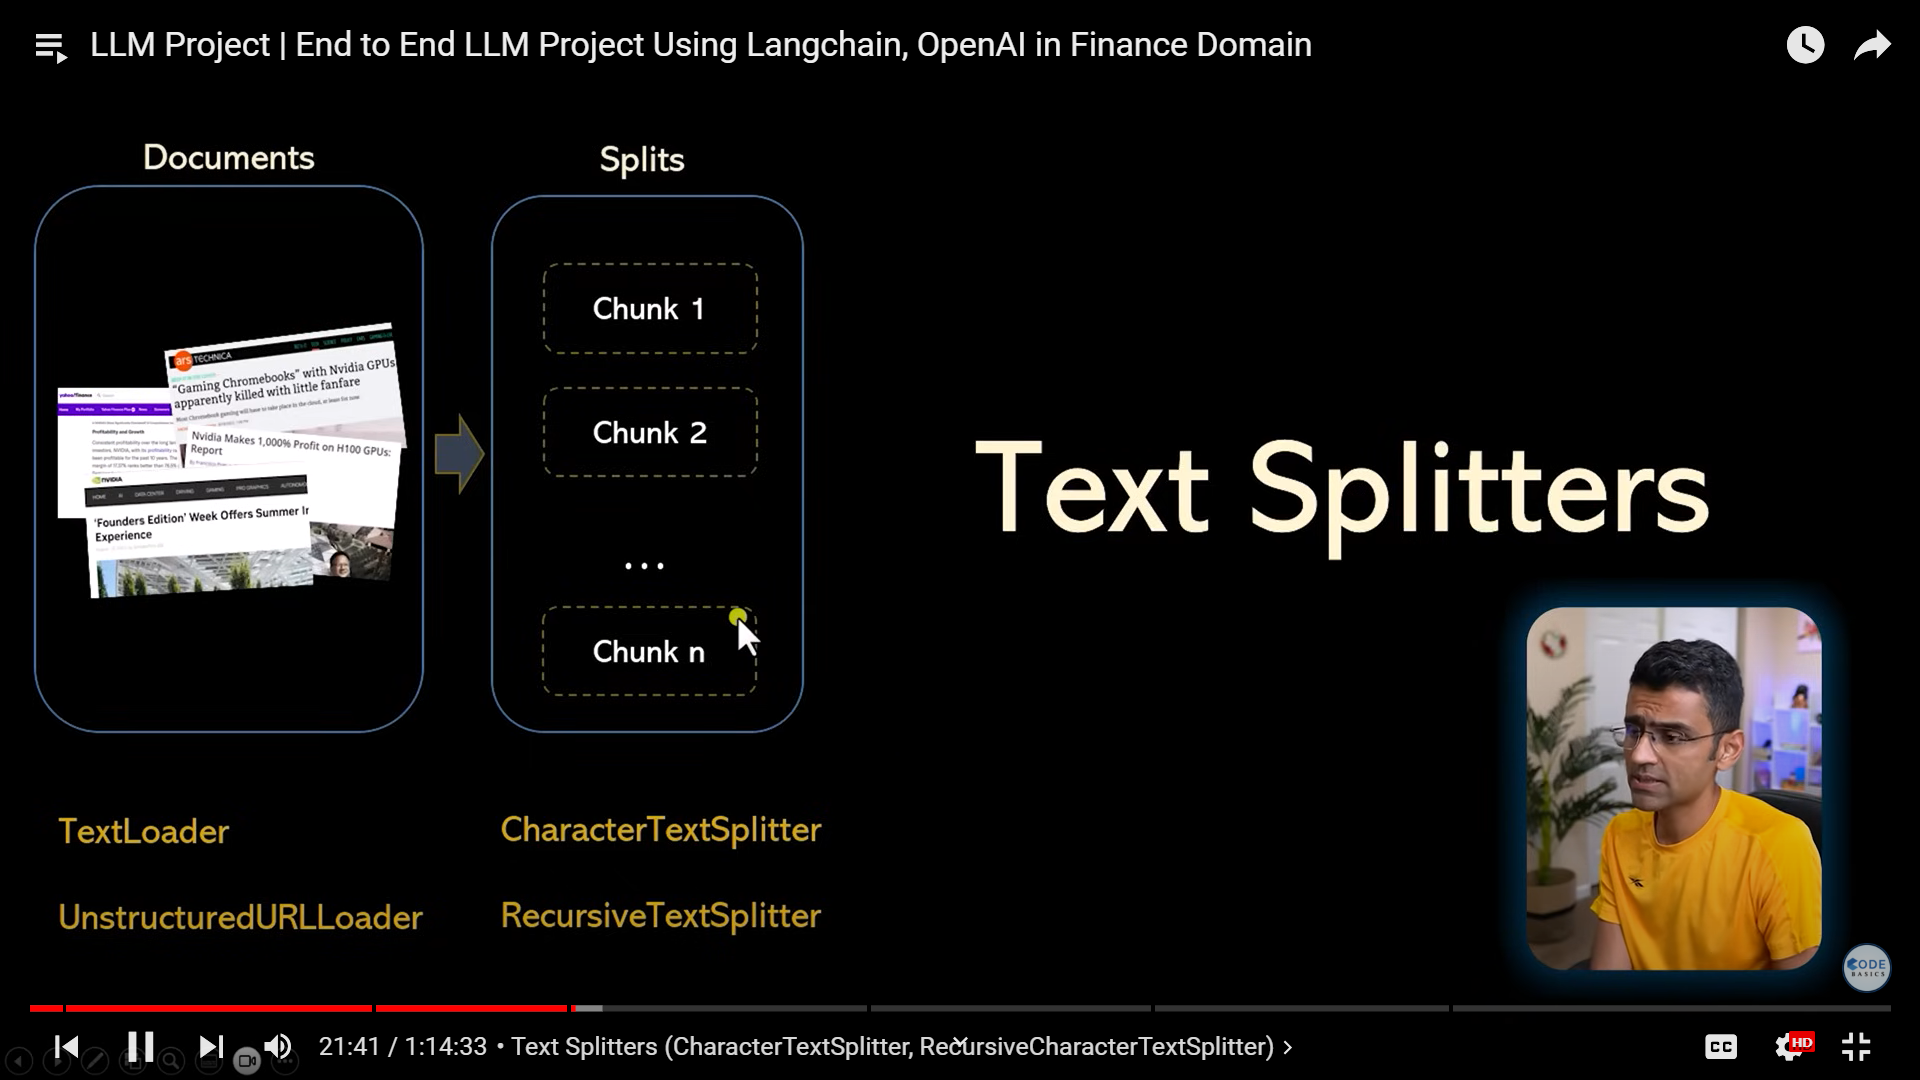

Reason we do this because there is token size limit . Thats why we create chunks 

So once we use CharacterTextSplitter or RecursiveTextSplitter . Our complete document is divided into chunks 
But our some chunks wil be small and some will be big . What we will do is based on token size limit of around
4000 tokens . We will merge chunks in such a way that they are around token size 

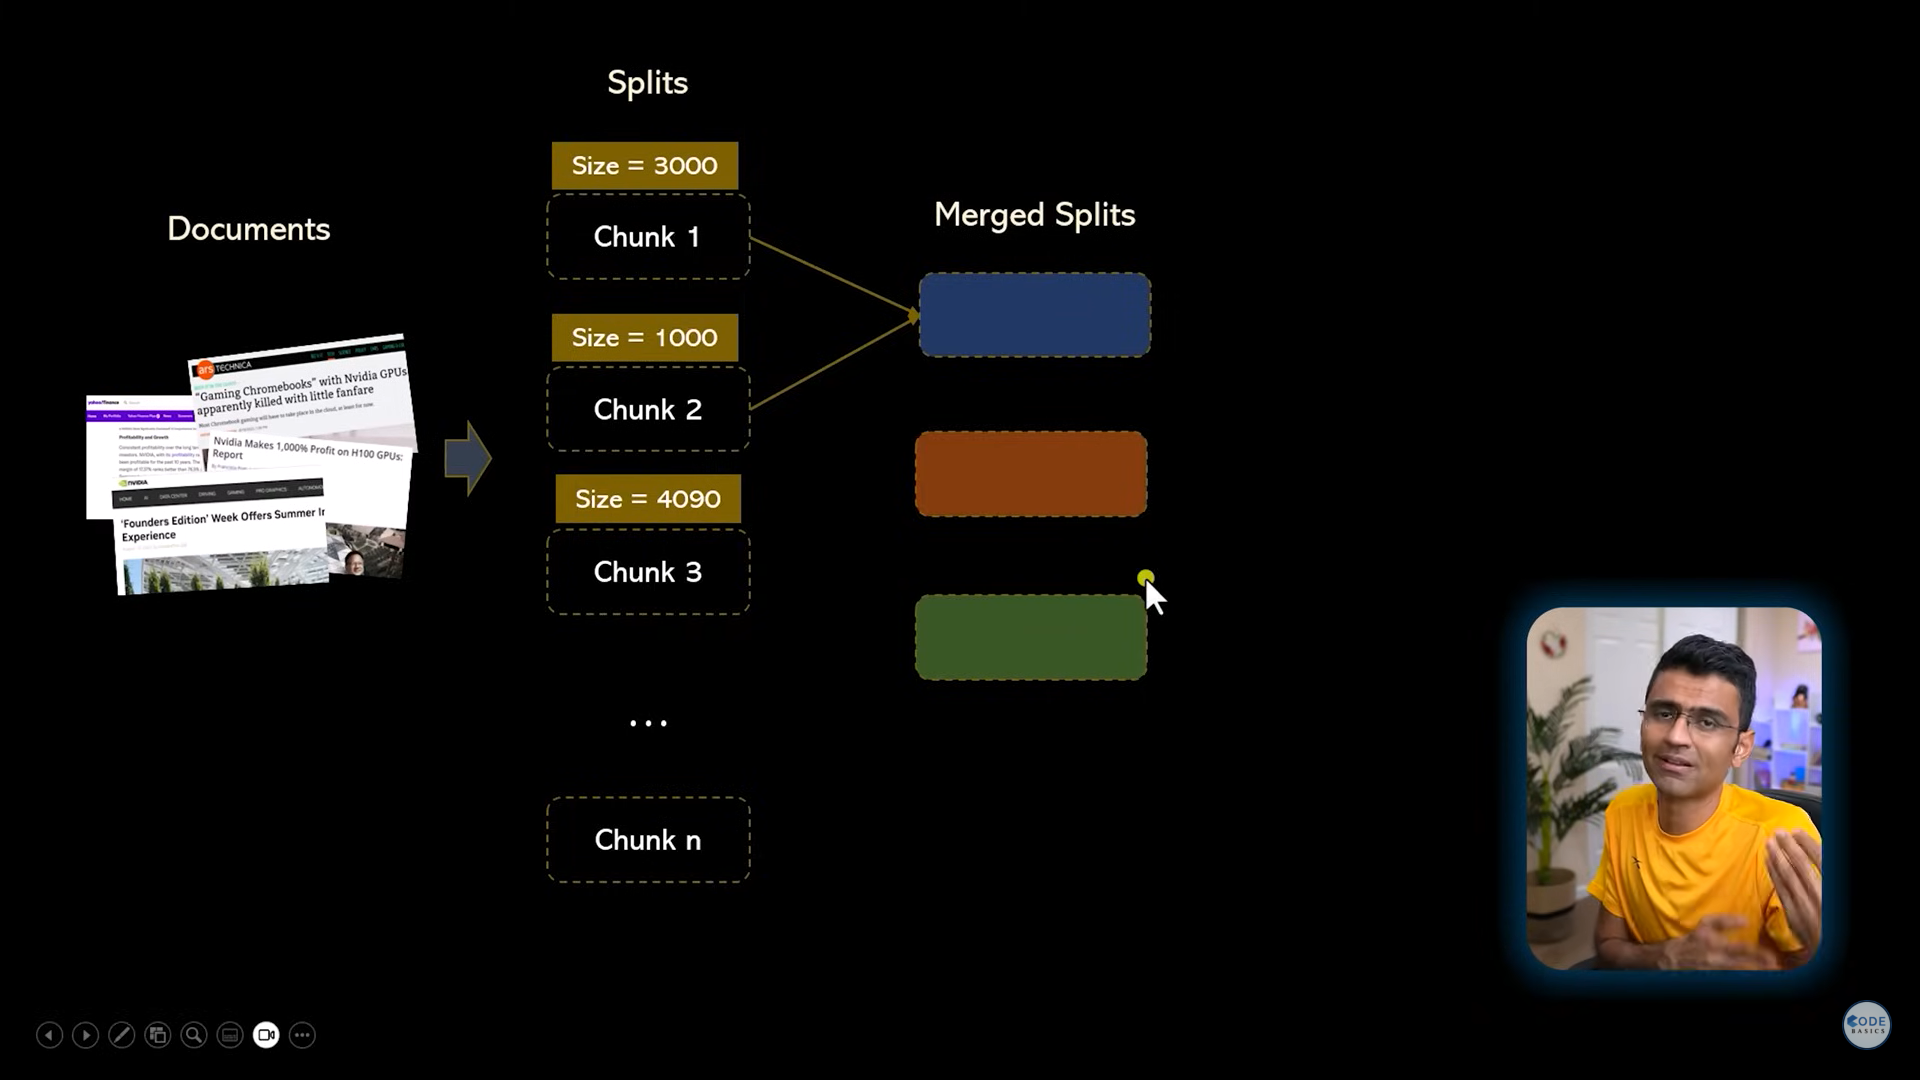

We will also do ChunkOverlap . So that we have some context of prev chunks in current chunk 

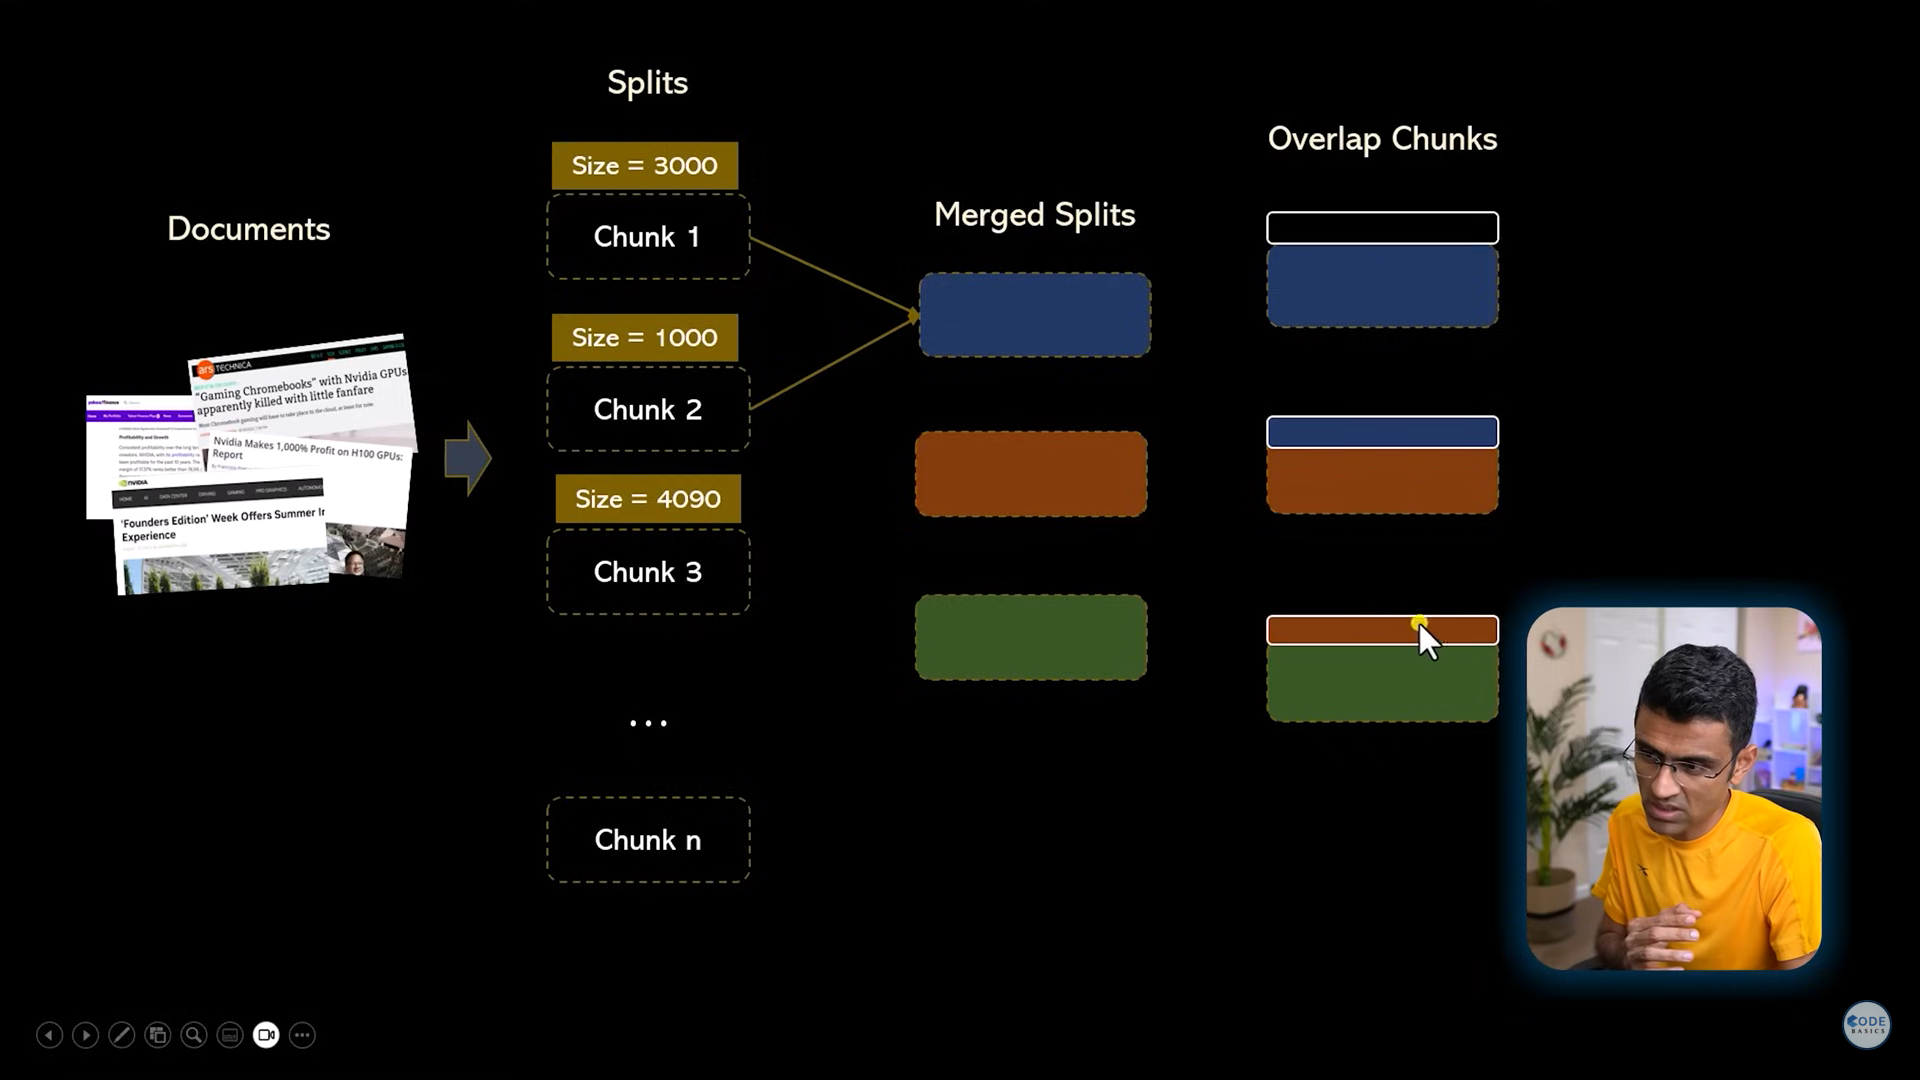

Text Splitters
Why do we need text splitters in first place?

LLM's have token limits. Hence we need to split the text which can be large into small chunks so that each chunk size is under the token limit. There are various text splitter classes in langchain that allows us to do this

In [7]:
text = """Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.

Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Kip Thorne, a Caltech theoretical physicist and 2017 Nobel laureate in Physics,[4] was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Principal photography began in late 2013 and took place in Alberta, Iceland, and Los Angeles. Interstellar uses extensive practical and miniature effects, and the company Double Negative created additional digital effects.

Interstellar premiered in Los Angeles on October 26, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews from critics and grossed over $681 million worldwide ($703 million after subsequent re-releases), making it the tenth-highest-grossing film of 2014. It has been praised by astronomers for its scientific accuracy and portrayal of theoretical astrophysics.[5][6][7] Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects, and received numerous other accolades.

"""

In [9]:
## Lets say you have limit of 200 tokens. SO we will split the above text into chunks in such a way that each chunk is around 200 tokens 
## Basic Approach 

text[:200] ## It cuts the data . This will not work 

'Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt'

In [10]:
# Well but we want complete words and want to do this for entire text, may be we can use Python's split funciton

words = text.split(" ")
len(words)

264

In [11]:
chunks = []

s = ""
for word in words:
    s += word + " "
    if len(s)>200:
        chunks.append(s)
        s = ""
        
chunks.append(s)

In [12]:
chunks[:2] ## Not a good approach and it is a length process 

['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt ',
 'Damon, and Michael Caine. Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in ']

Langchain provide apis for Splitting text into chunks in an efficient way 

In [14]:
from langchain.text_splitter import CharacterTextSplitter
## Each line will be in chunks . But further it might merge multiple chunks . So multiple lines will be in chunks 
splitter = CharacterTextSplitter(
    separator='\n',
    chunk_size=200,
    chunk_overlap=0)

chunks=splitter.split_text(text)
len(chunks)

Created a chunk of size 437, which is longer than the specified 200
Created a chunk of size 716, which is longer than the specified 200


3

In [15]:
for chunk in chunks:
    print(len(chunk))

437
716
611


In [16]:
chunks 

['Interstellar is a 2014 epic science fiction film co-written, directed, and produced by Christopher Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where humanity is embroiled in a catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for humankind.',
 'Brothers Christopher and Jonathan Nolan wrote the screenplay, which had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Kip Thorne, a Caltech theoretical physicist and 2017 Nobel laureate in Physics,[4] was an executive producer, acted as a scientific consultant, and wrote a tie-in book, The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Principal photography began in late 2013 and took place in Alb

'\n' is not available after some lines . So chunk size is >200 because of this separator. We can also try other separators like '.' . So CharacterTextSplitter will not work always . SO we will need Text Splitter which will split the text into multiple separators . ' . \n\n etc'. For this we can use RecursiveTextSplitter

##### Recursive Text Splitter 

In [18]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
r_splitter = RecursiveCharacterTextSplitter(
    separators=['\n\n','.',' ','\n'],
    chunk_size = 200,
    chunk_overlap = 0
)

## If chunk is >200 . It will use 2nd separator and so on
chunks = r_splitter.split_text(text)
len(chunks)

14

In [19]:
for chunk in chunks :
    print(len(chunk))

104
121
197
13
1
180
198
114
94
130
162
194
106
149


In [20]:
chunks = text.split('\n\n')
for chunk in chunks:
    print(len(chunk))

437
716
611
0


In [23]:
second_split = chunks[0].split(' ')
for chunk in second_split:
    print(len(chunk))

12
2
1
4
4
7
7
4
11
9
3
8
2
11
6
2
5
7
12
4
9
7
9
4
6
5
8
4
6
3
7
6
3
2
1
9
6
5
8
2
9
2
1
12
6
3
7
3
4
7
1
5
2
10
3
6
7
1
8
4
6
2
6
2
1
3
4
3
10


If chunk size is too small . It will merge chunks to the the limit. If needed

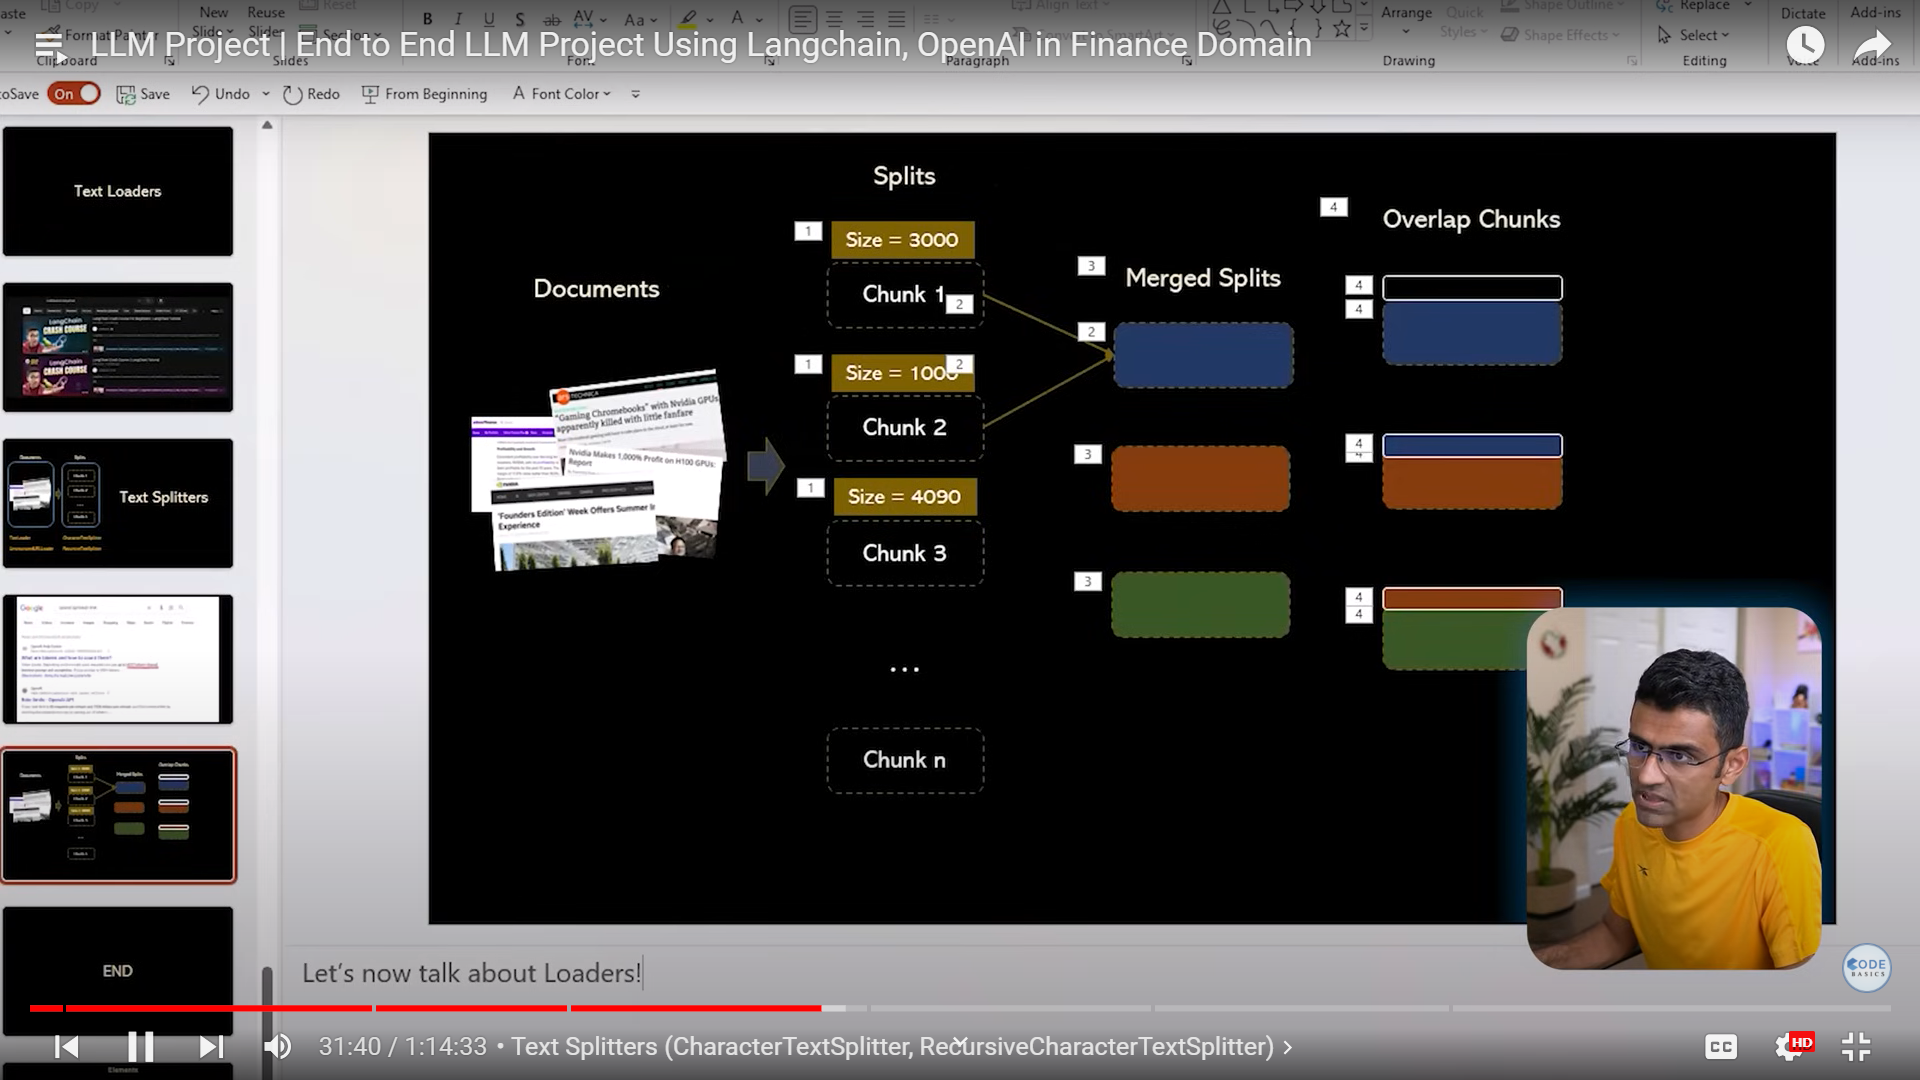

#### Vector Database - Vector Index - FAISS

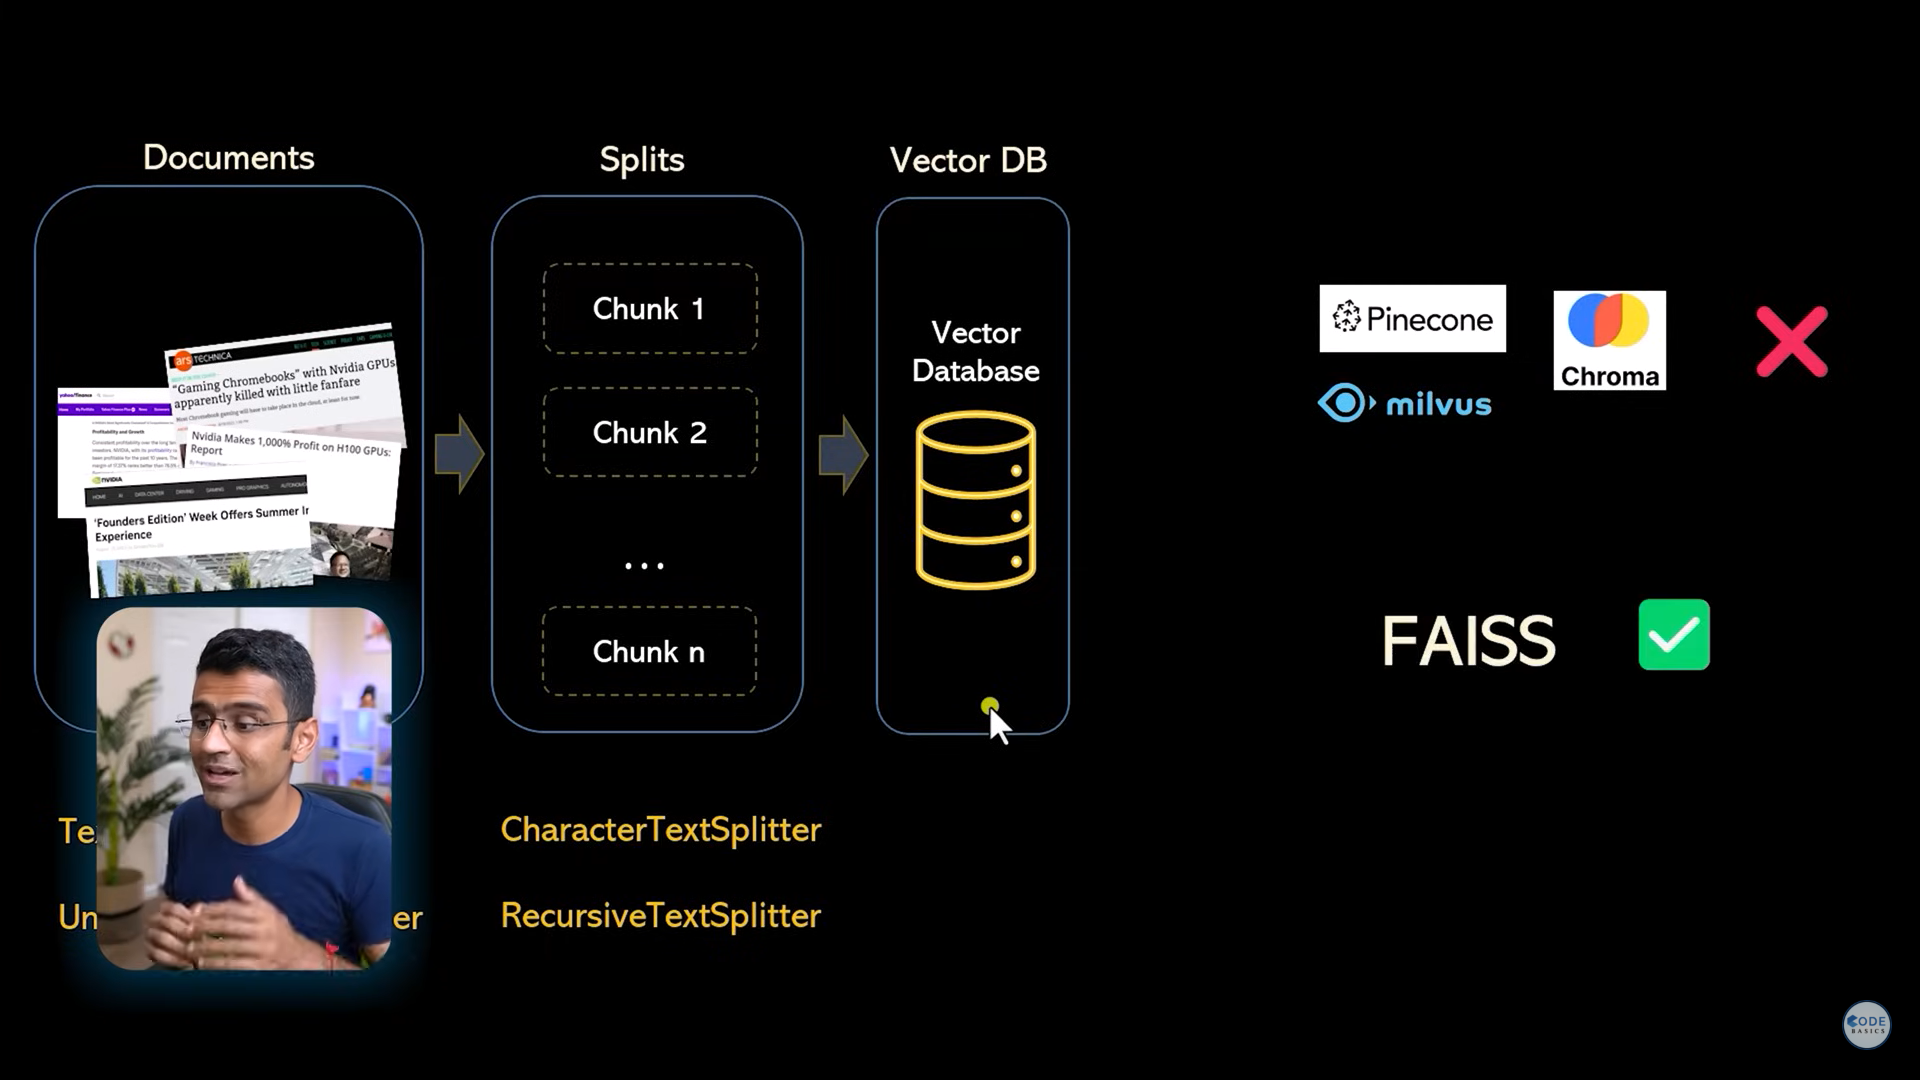